In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
%matplotlib inline

/home/lpo_albert/miniconda3/envs/hansys/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lpo_albert/miniconda3/envs/hansys/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/lpo_albert/miniconda3/envs/hansys/lib/python3.9/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See htt

* Carregar os dados

In [2]:
df_santarem = pd.read_csv('TORRE DE SANTAREM/Dataset/ameriflux-santarem-dados-processados.csv', sep=',')
display(df_santarem.head(3))

,Date,Year,DoY,Hour,LE_f,H_f,Rg_f,VPD_f,rH_f,Tair_f,Tsoil_f,PotRad_uStar,R_ref_uStar,PRP,NPP_uStar
0,2009-01-01,2009,1,0.0,-8.040,-7.967,0.0,0.014,100.0,22.341,30.156,0.0,4.4583,NaN,-5.8804
1,2009-01-01,2009,1,0.5,-8.040,-7.967,0.0,0.014,100.0,22.341,30.156,0.0,4.4583,NaN,-5.8804
2,2009-01-01,2009,1,1.0,-15.866,-5.177,0.0,0.014,99.5,22.360,30.156,0.0,4.4583,NaN,-5.8804


## Normalização

* Vamos retirar o Date para aplicarmos alguns modelos

In [3]:
df_santarem = df_santarem.drop('Date', axis=1)

* Para utilizar os modelos é nessário que os valores nulos sejam tratados. Podemos retirar as amostras que tenham alguma coluna com valor nulo ou substituir os valores nulos por algum número. Nessa caso, vamos substituir os valores nulos por 0.

In [4]:
# Substitui os valores nulos por 0
df_santarem.fillna(0, inplace=True)

* Os dados serão normalizados no intervalo de 0-1

In [5]:
from sklearn.preprocessing import MinMaxScaler
# Cria um objeto MinMaxScaler
scaler = MinMaxScaler()
# Ajusta e transforma os dados no intervalo [0, 1]
df_santarem_normalized = scaler.fit_transform(df_santarem)
# Converte para um dataframe
df_santarem = pd.DataFrame(df_santarem_normalized, columns=df_santarem.columns)

* Vamos separar a variável alvo (NPP_DT_VUT_MEAN) do dataset

In [6]:
# Obtém as variáveis independentes
X = df_santarem.drop(['NPP_uStar'],axis=1)

# Obtém a variável alvo
y = df_santarem['NPP_uStar']

## Feature Importance

In [7]:
# Obtém o nome das colunas
column_names = X.columns

### Feature Importance Usando Regressão Linear

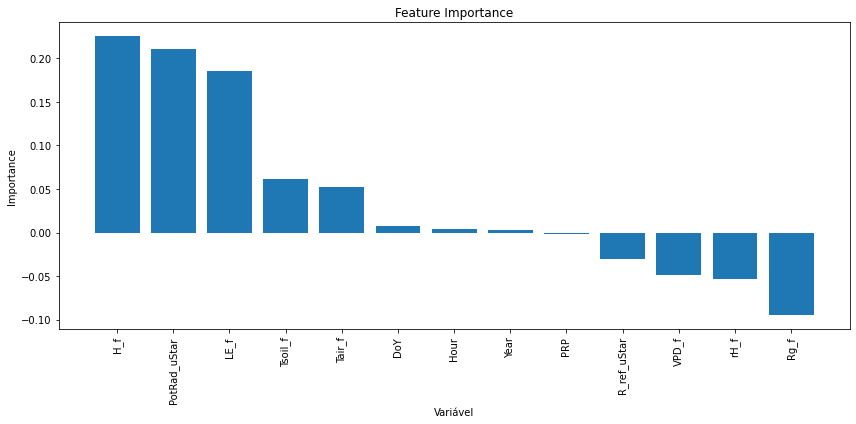

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define o modelo de regressão linear
rl_model = LinearRegression()

# Treina o modelo
rl_model.fit(X, y)

# Obtém o importance das variáveis
importance = rl_model.coef_

# Cria um DataFrame para armazenar o importance com os nomes das colunas
importance_df = pd.DataFrame({'Feature': column_names, 'Importance': importance})

# Ordena o DataFrame pelo importance em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Cria um gráfico de barras com os feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()

# Exibe o gráfico
plt.show()


### Feature Importance Usando Árvore de Decisão

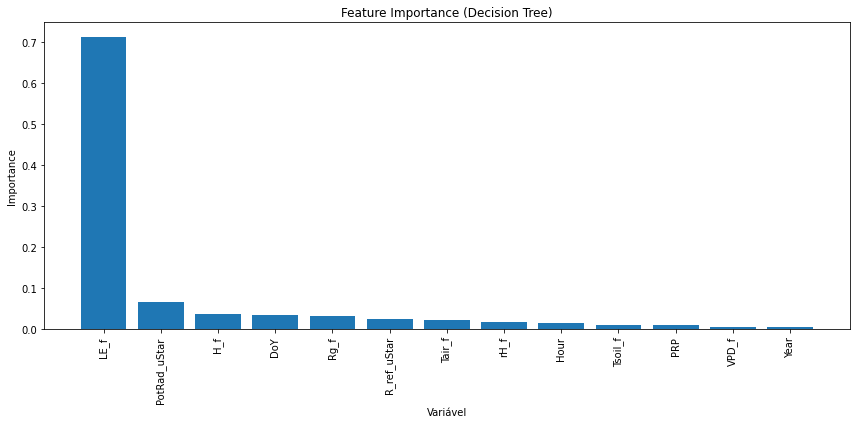

In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Define o modelo de árvore de decisão
tree_model = DecisionTreeRegressor()

# Treina o modelo
tree_model.fit(X, y)

# Obtém a importância das variáveis
importance = tree_model.feature_importances_

# Cria um DataFrame para armazenar a importância com os nomes das colunas
importance_df = pd.DataFrame({'Feature': column_names, 'Importance': importance})

# Ordena o DataFrame pela importância em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Cria um gráfico de barras com o feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Importance')
plt.title('Feature Importance (Decision Tree)')
plt.tight_layout()

# Exibe o gráfico
plt.show()


### Feature Importance Usando Random Forest

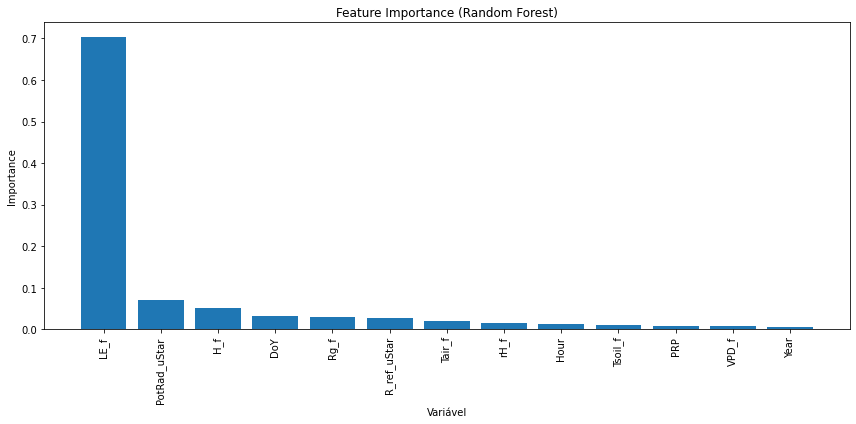

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define o modelo Random Forest
rf_model = RandomForestRegressor()

# Treina o modelo
rf_model.fit(X, y)

# Obtém a importância das variáveis
importance = rf_model.feature_importances_

# Cria um DataFrame para armazenar a importância com os nomes das colunas
importance_df = pd.DataFrame({'Feature': column_names, 'Importance': importance})

# Ordena o DataFrame pela importância em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Cria um gráfico de barras com o feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()

# Exibe o gráfico
plt.show()

### Feature Importance Usando XGBoost

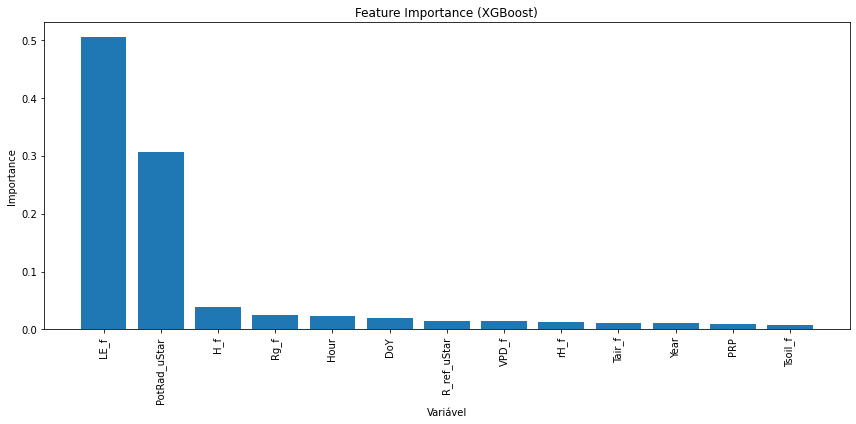

In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

# Define o modelo XGBoost
xgb_model = xgb.XGBRegressor()

# Treina o modelo
xgb_model.fit(X, y)

# Obtém a importância das variáveis
importance = xgb_model.feature_importances_

# Cria um DataFrame para armazenar a importância com os nomes das colunas
importance_df = pd.DataFrame({'Feature': column_names, 'Importance': importance})

# Ordena o DataFrame pela importância em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Cria um gráfico de barras com o feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Importance')
plt.title('Feature Importance (XGBoost)')
plt.tight_layout()

# Exibe o gráfico
plt.show()

### Feature Importance Usando GBM

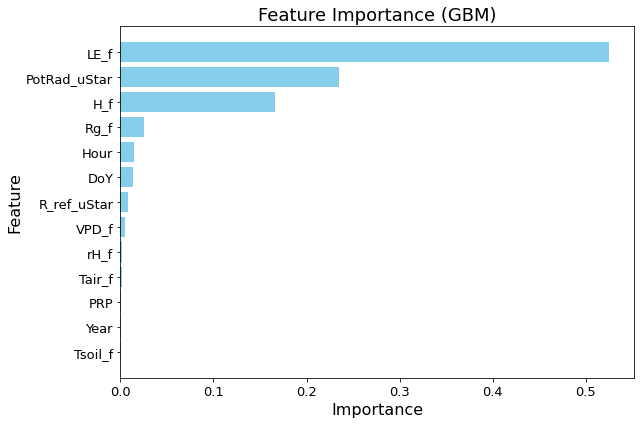

In [12]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

font_size = 16

# Define o modelo Gradient Boosting
gb_model = GradientBoostingRegressor()

# Treina o modelo
gb_model.fit(X, y)

# Obtém a importância das variáveis
importance = gb_model.feature_importances_

# Obtém o nome das colunas
column_names = X.columns

# Cria um DataFrame para armazenar a importância com os nomes das colunas
importance_df = pd.DataFrame({'Feature': column_names, 'Importance': importance})

# Ordena o DataFrame pela importância em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Cria um gráfico de barras invertido com o feature importance
plt.figure(figsize=(9, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')  # Adiciona cor
plt.xlabel('Importance', fontsize=font_size)  # Ajusta o rótulo do eixo x
plt.xticks(fontsize=font_size - 3)
plt.ylabel('Feature', fontsize=font_size)  # Ajusta o rótulo do eixo y
plt.yticks(fontsize=font_size - 3)
plt.title('Feature Importance (GBM)', fontsize=font_size + 2)
plt.tight_layout()

# Exibe o gráfico
plt.show()


## Modelos de Previsão

* Dividir os dados em treino e teste

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

* Vamos executar uma série de modelos para termos uma noção de qual apresenta o melhor desempenho

In [14]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

# Criar um LazyClassifier e treiná-lo com os dados de treino
clf = LazyRegressor()
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [28:37<00:10, 10.61s/it]   

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2845
[LightGBM] [Info] Number of data points in the train set: 42048, number of used features: 13
[LightGBM] [Info] Start training from score 0.490244


100%|██████████| 42/42 [28:38<00:00, 40.93s/it]


In [15]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.94       0.94  0.03       13.50
RandomForestRegressor                        0.93       0.93  0.04       37.51
BaggingRegressor                             0.92       0.92  0.04        4.78
XGBRegressor                                 0.89       0.89  0.05        5.13
DecisionTreeRegressor                        0.87       0.87  0.05        0.66
KNeighborsRegressor                          0.87       0.87  0.05        1.71
LGBMRegressor                                0.86       0.86  0.05        1.50
HistGradientBoostingRegressor                0.86       0.86  0.05        2.98
NuSVR                                        0.85       0.85  0.05      984.32
GradientBoostingRegressor                    0.83       0.83  0.06       14.06
SVR                                          0.81   

### SHAP (SHapley Additive exPlanations) 
* is a game theoretic approach to explain the output of any machine learning model.
* Analisar o grau de importância das variáveis XGBoostRegressor

In [36]:
import shap

In [37]:
# Cria um DataFrame a partir do vetor X_train e dos nomes das colunas
# Usamos X_train_df para podermos visualizar o nome das features no gráfico do SHAP
X_train_df = pd.DataFrame(data=X_train, columns=column_names)

X_test_df = pd.DataFrame(data=X_train, columns=column_names)


* Valores SHAP em relação a todo o conjunto de treino

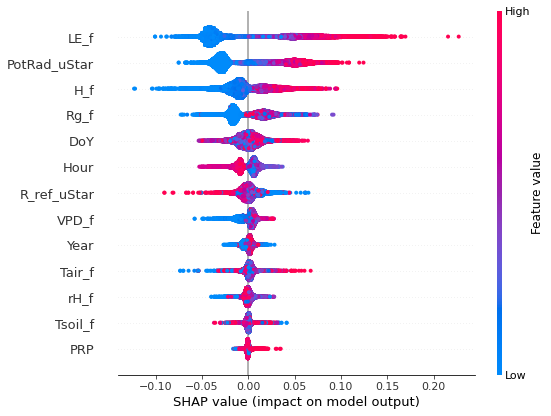

In [38]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train_df)

shap.plots.beeswarm(shap_values, max_display=None)

* Valores do SHAP em relação a uma amostra

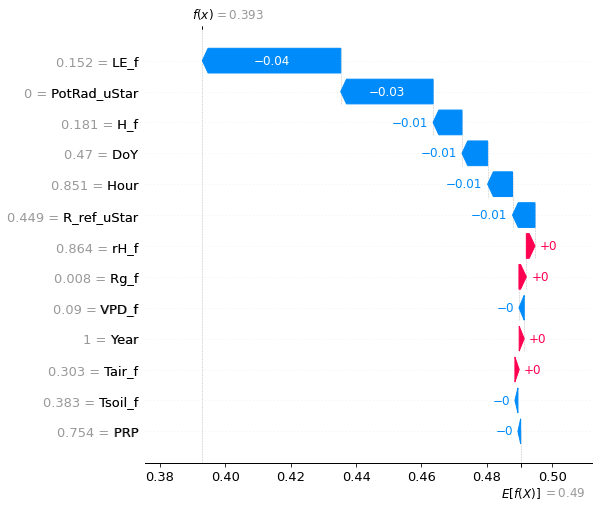

In [39]:
sample = 132
shap.plots.waterfall(shap_values[sample], max_display=len(shap_values[0].values))